In [2]:
import pandas as pd
import networkx as nx
import mpbn
from scipy.stats import poisson
from scboolseq import scBoolSeq

import glob 
import numpy as np
import pandas as pd
import sklearn

/home/pauleve/.local/lib/python3.12/site-packages/scboolseq/binarization.py:46: UserWarning: 
Scikit-learn's transform output is set to `default`
Please consider calling `sklearn.set_config(transform_output='pandas')` to set this option globally.
Otherwise use a config context to conserve DataFrame output
>>>with sklearn.config_context(transform_output='pandas'):
>>>    bin_rna_data = scboolseq.scBoolSeq().fit_transform(log_rna_data)
  warnings.warn(


In [3]:
ground_truth_prefix = "../ground-truth/"
workdir = "_workdir"
background_scRNA_seq = "GSE60361_mouse_brain.csv"
background_scRNA_seq_src = f"https://github.com/bnediction/scBoolSeq-supplementary/raw/main/data_filtered_vargenes/{background_scRNA_seq}"
output_prefix = "../"

SEED = 21382

In [4]:
background_scRNA_seq_file = f"{workdir}/{background_scRNA_seq}"
! test -f {background_scRNA_seq_file} || (mkdir {workdir} && curl -fL {background_scRNA_seq_src} -o {background_scRNA_seq_file})

In [5]:
ref_data = pd.read_csv(background_scRNA_seq_file, index_col=0)
ref_data.head()

,Atp1b2,Cxcl14,Nacc2,Scg2,Nrxn3,Rph3a,Pcp4l1,Ablim1,Xist,Marcks,Pebp1,Stxbp1,Prkar1b,Aldoa,Rcan2,Mllt11,Syt1,Ndrg4,Rab3a,Celf4,Syp,Atp6v0c-ps2,Rab6b,Atp6v1a,Ywhag,Snurf,Nrip3,Efr3b,Rgs10,Slc6a1,Gad1,Gad2,Dner,Gabrb2,Gabra1,Spock3,Spock1,Npy,Sst,Tsix,Zwint,Stmn3,Serpini1,Synpr,Ldhb,Fkbp3,Ngfrap1,Mdh1,Myl12b,Atp6v1e1,Uchl1,Got1,Tubb2a,Tuba1a,Stmn2,Snap47,Tubb3,Clu,Cst3,Atp5g1,Atp2b2,Mef2c,Osbpl1a,Dclk1,Vsnl1,Camk2n1,Lamp5,Slc1a2,Ncald,Grm3,Kcna1,Chgb,Pcp4,Pcsk2,Snap25,Thrsp,Rps15a-ps4,Tagln3,Pfkp,Tpi1,Mif,Pld3,Atp6v1d,Atpif1,Scg5,Nme1,Tuba4a,Id2,Nrxn1,Npcd,Snhg11,Pisd-ps3,Ryr2,Meg3,Chd3,Cpne7,Nov,Nnat,Syn2,Calb1,Chl1,Sv2b,Gap43,Ttc3,Cplx2,Pde1a,Gda,Lmo4,Eno2,Cpne6,Ywhah,Nsf,Ahi1,Crym,Atp6v1g2,Napb,Zcchc18,Sparcl1,Snca,Gpr22,Ntm,Fbxw7,Ensa,Ywhaz,Pfn2,3110035E14Rik,Cck,Ndrg3,Gpm6a,Pls3,Mapk10,Nrn1,Caly,Mmd2,Dynll1,Gpm6b,Gstp1,Ociad2,Chn1,Calm2,Tmsb4x,Spink8,Rab3c,Slc22a17,Tenm2,Dgkg,Syt4,Scn2a1,Arpp21,Ptprs,Pgm2l1,Kcnma1,Synj1,Gls,Syn1,Ptprn,Snap91,Maged1,Atp1b1,Rtn1,Nfib,Mtpn,Map1b,Syt11,Sptbn1,Cpe,Basp1,Aplp1,2900097C17Rik,Dnm1,2900060B14Rik,Hsph1,Rbfox3,Camk2b,Nrgn,Gabrg2,Abr,Celf5,Ncdn,Nell2,Gabra5,Fibcd1,Fam131a,Pja2,Cnksr2,Ppp3cb,Calm3,Ddn,Camkv,Epha4,Ctxn1,Olfm1,Ppp3ca,Tspan13,Ptk2b,Bcl11b,Gria1,Atp1a3,Dkk3,Thy1,Zbtb18,Elmod1,Myt1l,Arf3,Frrs1l,Kalrn,Itpka,Ppm1e,Gria2,Wasf1,Baiap2,Rasgrp1,Grin2b,Atp2b1,Foxp1,Dlgap1,Nsg2,Camk2a,Grm5,6330403A02Rik,Rgs7bp,Rbfox1,D3Bwg0562e,Cacna2d1,Nptn,Cx3cl1,Ppp3r1,Alcam,Kif5c,Enc1,Cyfip2,Prkcb,Atp2a2,Celf2,Slc8a1,Kctd12,Brinp1,Rasgrf1,Gria3,Rgs4,Slc24a2,Egr1,Iqgap2,Wipf3,Cadm2,2010300C02Rik,Wfs1,Plk2,Lpl,Ddx3y,Neurod6,Hpca,Prex1,Bcas1,Magt1,Chn2,Sc4mol,Psat1,Gltp,Scd2,Cyp51,Elovl7,Hmgcs1,Taldo1,Mbp,Tmem125,Tsc22d4,Arpc1b,Adamts4,Sirt2,Gng12,Gnb4,Myo6,Sema6a,Scrg1,Idh1,Gjc2,Slc44a1,Rab31,Cldn11,Slc12a2,Qk,Gab1,Ado,Ephb1,Kcnj10,Frmd8,Sox10,Gjc3,Il1rap,Mtus1,Mcam,Plat,Tspan2,Cnp,Lap3,Gamt,Plp1,Fabp5,Lgi3,Tmeff2,Tppp3,Mobp,Cers2,Sypl,Grb14,Cd63,Csrp1,Elovl1,Cpm,Abhd3,Hist1h2bc,2810468N07Rik,Sept4,Smco3,Gsn,Prdx6,Pdlim2,Cmtm5,1500004A13Rik,Asrgl1,Dbndd2,Npc2,Myo1d,Gng5,Hadh,Cyp2j6,Jun,Nkx6-2,Ppp2r3a,Npc1,Vamp3,Plekhb1,Cdc42ep2,Lamp2,Mog,Malat1,Fah,Cd9,Ptn,Ypel2,Tjap1,Plod1,Enpp2,Opalin,Jam3,Ptgds,Pllp,Zdhhc9,Tmem88b,Ddr1,Abhd4,Carhsp1,Wscd1,S1pr5,Unc5b,Degs1,Gpr37,Dock10,Cdc42ep1,Tmbim1,Phldb1,Lpar1,Pcdh9,Efnb3,Fgfr2,Enpp4,Ugt8a,Clic4,Rap1a,Mag,Nudt4,Foxn3,Ptprd,Tspan15,Hepacam,Rhog,Galnt6,Adam17,4931406P16Rik,Reep3,Erbb2ip,Hhip,Olig1,Dip2a,Nkain1,Stxbp3a,Micall1,Plekhh1,Tjp2,St18,Clmn,Neat1,Trim59,Scd1,Zcchc24,Evi2a,Usp54,Prr5l,Fa2h,Tmem229a,Daam2,Tmem63a,Dpy19l1,Ttyh2,Arsg,Cntn2,Fos,Fnbp1,Fosb,Gprc5b,Qdpr,Mal,Ndrg1,Srd5a1,Slc38a2,Fermt2,Efhd1,Edil3,Cd82,Gatm,Phgdh,Ermn,Rnf13,Litaf,Cryab,Aspa,Nmral1,Car2,Car14,Dbi,Evi2a-evi2b,Pla2g16,Tnfaip6,Hrsp12,Mid1ip1,Pon2,Gjb1,S100a16,Jup,Glul,Adipor2,Elovl5,Gstm7,Anln,Trf,Hapln2,Enpp6,Gng11,Cd59a,Apod,Klk6,Pmp22,S100b,S100a13,Serpinb1a,S100a1,S100a6,Btg2,Atf3,Nfkbia,Ctss,Ppp1r15a,Lgals1,Tyrobp,B2m,Sepp1,C1qb,C1qa,Fcgrt,Csf1r,Nfe2l2,Zfp36,Ier3,Zfp36l1,Vtn,Slco1a4,Itm2a,Hspa1a,Cyr61,Hspa1b,Slco1c1,Sgms1,Mfsd2a,Flt1,Abcb1a,Pltp,Prom1,Fn1,Slc2a1,Sparc,Ptprb,Id1,Dusp1,Epas1,Hes1,Rgs5,Ptrf,Esam,Srgn,Ifitm3,Utrn,Ly6c1,Klf2,Tm4sf1,Vim,Apold1,Adamts1,Klf4,Serpinh1,Anxa5,BC028528,Myl12a,Gimap6,Ctla2a,Cd93,Arap3,Igfbp7,Col4a1,Vwa1,Cldn5,Tmem176b,Sat1,Vegfa,S1pr1,Tril,Mfge8,Timp3,Appl2,Bcan,Ppap2b,Slc39a12,Htra1,Slc38a3,Ptprz1,Gpr37l1,Atp1a2,Slc4a4,Slc1a3,Rorb,Gja1,Acsbg1,Cldn10,Sox9,Fam107a,Ntsr2,Aldoc,Serpine2,Ndrg2,Mt2,Lcat,Apoe,Pla2g7,Mt1,Mlc1,Aqp4,Ednrb,Fabp7,Sdc4,Gstm1,Hopx,Fxyd1,Id3,Mgp,Acta2,Myl9,Crip1,Sptssa,Dynlt1b,Ctnna1
1772071015-C02,8.489427,8.933823,0.000000,9.535737,8.933823,8.913243,8.128726,7.974452,8.342811,8.422048,8.489427,8.891416,8.722841,9.439466,8.128726,8.685712,9.318062,8.971612,8.599097,8.547780,8.816614,9.259713,8.342811,9.177479,8.816614,8.933823,9.126119,7.760069,8.547780,8.128726,9.186777,8.953234,8.989024,8.843293,8.989024,8.599097,7.426293,9.649451,0.0,6.766709,7.760069,9.064747,8.722841,9.090729,8.342811,7.974452,8.489427,9.090729,8

In [6]:
with sklearn.config_context(transform_output="pandas"):
    scbool = scBoolSeq().fit(ref_data)

/usr/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
!mkdir -p {output_prefix}timeseries/

In [9]:
def extract_dyn_from_trajdf(traj_df):
    dyn = nx.DiGraph()
    states = list(sorted(traj_df.index))
    for i, state in enumerate(states):
        dyn.add_node(state)
        if "_to_" in state:
            parts = state.split("_")
            num = int(parts[-1])
            if num == 1:
                prev = parts[0]
            else:
                prev = states[i-1]
            dyn.add_edge(prev, state)
            succ = states[i+1].split("_") if i < len(states)-1 else []
            if succ[:3] != parts[:3]:
                dyn.add_edge(state, parts[2])
    return dyn

def extract_paths_from_dyn(dyn):
    inits = [state for state in dyn.nodes() if dyn.in_degree(state) == 0]
    assert len(inits) == 1
    finals = [state for state in dyn.nodes() if dyn.out_degree(state) == 0]
    paths = [next(iter(nx.simple_paths.shortest_simple_paths(dyn, inits[0], final))) for final in finals]
    return paths

def get_path_probs_at_timestep(path, T):
    P = poisson.pmf(range(len(path)), T)
    P[-1] += 1-sum(P)
    P /= max(P)
    return P

def make_nb_samples_at_timestamp(traj_df, paths, T, nbcells=(400,600)):
    n_cells = np.random.randint(*nbcells, size=len(traj_df.index))
    idx = traj_df.index.to_list()
    n_samples = [0]*len(idx)
    probs = [0]*len(idx)
    for p in paths:
        Probs = get_path_probs_at_timestep(p, T)/len(paths)
        for state, prob in zip(p, Probs):
            i = idx.index(state)
            probs[i] += prob
    for i, prob in enumerate(probs):
        n_samples[i] = np.random.binomial(n_cells[i], prob)
    return n_samples

In [10]:
def expand_bindata(traj_df, n_samples):
    d = traj_df.copy(deep=True).values.repeat(n_samples, axis=0)
    return pd.DataFrame(d, columns=traj_df.columns)

def push_mutants_counts(counts, name):
    for label, mutant_counts in counts.groupby(lambda idx: idx.split("#")[0]):
        label = label.replace('@', '-T')
        mutant_counts.index = [idx[idx.index("#")+1:] for idx in mutant_counts.index]
        print(label, name)
        mutant_counts.T.to_csv(f"{output_prefix}timeseries/{label}-{name}.csv")

def make_mutant_counts(traj_df, n_samples, SEED=SEED):
    bindata = expand_bindata(traj_df, n_samples)
    for args, name in [({}, "normalized-scRNAseq-dropouts")]:
        counts = scbool.sample_counts(bindata, n_samples_per_state=1, random_state=SEED)
        counts.index = [f"{x}_{y}" for i,x in enumerate(traj_df.index) for y in range(n_samples[i])]
        counts.index.name = "cellID"
        push_mutants_counts(counts, name)

In [11]:
traj_df = pd.read_csv(ground_truth_prefix + "wt-boolean-trajectories.csv", index_col=0)
traj_df.index

Index(['init', 'init_to_steady1_1', 'init_to_steady1_2', 'init_to_steady1_3',
       'init_to_steady1_4', 'init_to_steady1_5', 'init_to_steady1_6',
       'init_to_steady1_7', 'init_to_steady1_8', 'init_to_steady1_9',
       'steady1'],
      dtype='object')

# computing graph layout...


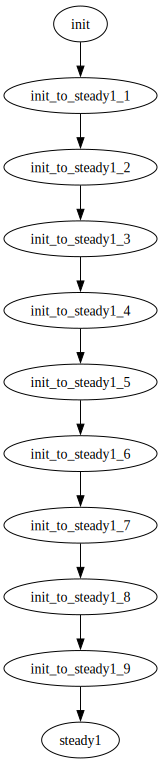

In [12]:
extract_dyn_from_trajdf(traj_df)

In [13]:
_suffix = "-boolean-trajectories.csv"
_dfs = []
n_samples = []
for i, traj_file in enumerate(glob.glob(f"{ground_truth_prefix}*{_suffix}")):
    label = traj_file[len(ground_truth_prefix):-len(_suffix)]
    print(label)
    traj_df = pd.read_csv(traj_file, index_col=0)
    dyn = extract_dyn_from_trajdf(traj_df)
    paths = extract_paths_from_dyn(dyn)
    STEPS = np.linspace(1, max(len(p) for p in paths), 5).astype(int)
    print(STEPS)
    for T in STEPS:
        _df = traj_df.copy()
        _dfs.append(_df)
        _df.index = [f"{label}@{T}#{i}" for i in traj_df.index]
        n_samples += make_nb_samples_at_timestamp(traj_df, paths, T)
trajs_df = pd.concat(_dfs)
make_mutant_counts(trajs_df, n_samples)

wt
[ 1  3  6  8 11]
gene1KO
[ 1  3  5  7 10]
gene2KO
[ 1  3  5  7 10]
gene3KO
[ 1  3  5  7 10]
gene4KO
[ 1  3  5  7 10]
gene5KO
[ 1  3  5  7 10]
gene6KO
[ 1  3  5  7 10]
gene7KO
[ 1  3  5  7 10]
gene8KO
[ 1  3  5  7 10]
gene9KO
[ 1  3  5  7 10]
gene10KO
[ 1  3  5  7 10]


/home/pauleve/.local/lib/python3.12/site-packages/scboolseq/simulation.py:862: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  "Skewness": ss.skew(trajectory),
/home/pauleve/.local/lib/python3.12/site-packages/scboolseq/simulation.py:863: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  "Kurtosis": ss.kurtosis(trajectory),
/usr/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


gene10KO-T1 normalized-scRNAseq-dropouts
gene10KO-T10 normalized-scRNAseq-dropouts
gene10KO-T3 normalized-scRNAseq-dropouts
gene10KO-T5 normalized-scRNAseq-dropouts
gene10KO-T7 normalized-scRNAseq-dropouts
gene1KO-T1 normalized-scRNAseq-dropouts
gene1KO-T10 normalized-scRNAseq-dropouts
gene1KO-T3 normalized-scRNAseq-dropouts
gene1KO-T5 normalized-scRNAseq-dropouts
gene1KO-T7 normalized-scRNAseq-dropouts
gene2KO-T1 normalized-scRNAseq-dropouts
gene2KO-T10 normalized-scRNAseq-dropouts
gene2KO-T3 normalized-scRNAseq-dropouts
gene2KO-T5 normalized-scRNAseq-dropouts
gene2KO-T7 normalized-scRNAseq-dropouts
gene3KO-T1 normalized-scRNAseq-dropouts
gene3KO-T10 normalized-scRNAseq-dropouts
gene3KO-T3 normalized-scRNAseq-dropouts
gene3KO-T5 normalized-scRNAseq-dropouts
gene3KO-T7 normalized-scRNAseq-dropouts
gene4KO-T1 normalized-scRNAseq-dropouts
gene4KO-T10 normalized-scRNAseq-dropouts
gene4KO-T3 normalized-scRNAseq-dropouts
gene4KO-T5 normalized-scRNAseq-dropouts
gene4KO-T7 normalized-scRNAseq